In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
import sklearn as sk
from sklearn import datasets, linear_model

#  Неполиноминальная функция с шумом

Зададим неполиноминальную функцию с шумом. 

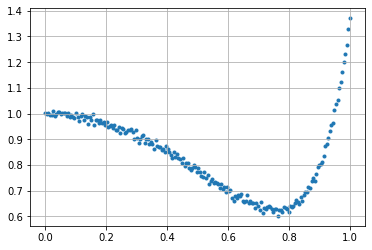

In [2]:
#Зададим неполиноминальную функцию с шумом
size = 200
x = np.linspace(0,1,size)
y = np.exp(-x**2)+x**10+np.random.normal(0, 0.01, x.shape)
fig, ax = plt.subplots()
ax.scatter(x,y, marker = '.')
ax.grid()
plt.show()

Решим задачу регрессии с L1-регуляризацией с помощью метода градиентного спуска, как это было в лекции. 

score = 0.18054588555564108


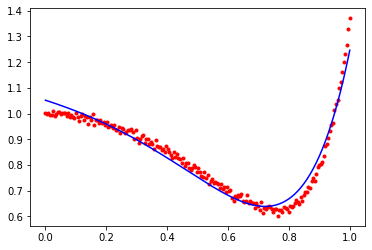

In [3]:
MAX_ORDER = 7
polynomial_features = PolynomialFeatures(MAX_ORDER, include_bias=False)
X = polynomial_features.fit_transform(x.reshape(-1,1))
#отнормируем столбцы матрицы X
Xn = (X-np.mean(X,axis=0))/(np.std(X,axis=0)+0.1)
Xn = np.hstack((np.ones((Xn.shape[0],1)),Xn))
#Возьмём функцию градиентного спуска из семинара A3
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w
#Обучение без кросс-валидации
w0 = np.random.normal(0, 0.01, Xn.shape[1])
w = make_L1_regression_grad_descent_iteration(Xn, y, w0, 0.01, 0.00001)
for i in range (10000):
      make_L1_regression_grad_descent_iteration(Xn, y, w, 0.01, 0.00001)
plt.scatter(x, y, color="r", marker = '.')
plt.plot(x, Xn @ w, color="b")
print("score =", np.sum((Xn @ w - y)**2))
plt.show()

# Теорема Байеса

Основная идея теоремы Байеса состоит в том, чтобы получить большую точность оценки вероятности события путем учета дополнительных данных.

Принцип прост: есть первоначальная основная оценка вероятности, которую уточняют c получением большего количества информации.
Интуитивные действия формализуются в простом, но мощном уравнении (формула вероятности Байеса):

$P(B|A) = P(A|B)*P(B)/P(A) $

Левая часть уравнения — апостериорная оценка вероятности события B при условии наступления события A (т. н. условная вероятность).

P(B)  — вероятность события B (основная, априорная оценка);

P(A|B) — вероятность (также условная), которую мы получаем из наших данных;

а P(A) — константа нормировки, которая ограничивает вероятность значением 1. P(A) — это вероятность события A, которую в общем случае можно получить с помощью формулы полной вероятности. 

Эту формулу можно переписать для случая, когда мы одновременно рассматриваем изменение вероятности истинности множества гипотез. Представим себе следующую ситуацию. До опыта о его услових можно было сделать ряд гипотез $B_1$, $B_2$, $B_3$, ... несовместных и образующих полную группу.

Пусть вероятности гипотез до опыта (называемые также априорными вероятностями) заданы и равны



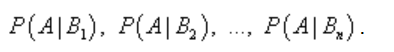

Теперь предположим, что опыт произведён и в его результате появилось событие A. Как нужно пересмотреть вероятности гипотез с учётом этого факта?

Формула Байеса представляет собой отношение произведения вероятности одного из событий системы на условную вероятность этого события относительно соответствующего события системы к полной вероятности наступления события A с учётом всех событий системы.

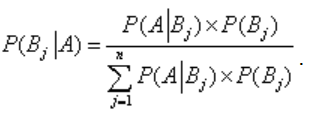

Видим, что знаменатель в этой формуле - ничто иное, как полная вероятность события A, а числители для каждого отдельного случая равны первому, второму, и так далее до n-го слагаемому суммы, находящейся в знаменателе.

Формула Байеса может быть также записана в виде

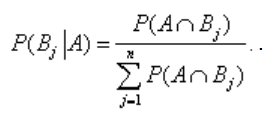 

# Оценка распределений.

Теорему Байеса можно использовать и в непрерывном случае - для оценки параметров непрерывных распределений.
Пусть $P(λ)$ - априорное распределение значения параметра распределения, $P(λ|m)$ -апостериорное.

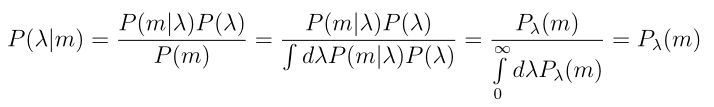 

Как видим, отличие в основном в том, что в формуле полной вероятности сумму заменил интеграл по распределению. 

Рассмотрим пример. Пусть есть монетка, которая может выдавать падать орлом или решкой. Первое обозначим как m = 1, второе как m = 0. Пусть $λ$ - вероятность того, что монетка выпадет орлом. Тогда получаем: 


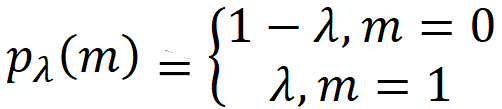 

В качестве априорного распределения берем равномерное. 

$P(λ)$ = 1

Тогда при условии, что один раз выпало орлом, плотность вероятности значения параметра будет равна

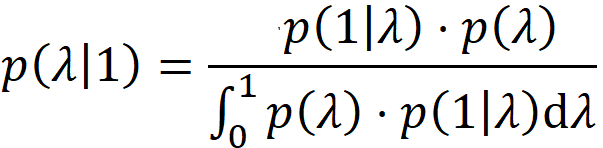 

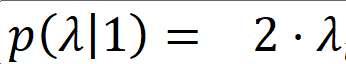 

Аналогично можно посчитать $P(λ|1,1)$ и $P(λ|1,0)$ , подставив в качестве априорного распределения $P(λ|1)$, а в качестве очередного результата опыта m = 1 или 0 соответственно.  

# Bias - Variance.

Пусть есть некоторая выборка, которую нам удобно описать линейной функцией, пусть эта функция будет истинная (реальная). Но мы хотим описать данную выборку кривой линией и для этого нам стоит ввести целый набор оценочных кривых и после выбирать какая из них самая оптимальная. Здесь появляется дилемма смещения-дисперсии опираясь на которую мы выбираем наилучшую кривую. Данная дилемма заключается в конфликте при попытке минимизировать сразу два источника ошибки. Минимизация их влияния на модель будет заключатся в хорошо подобранной сложности модели. Оптимальная кривая (модель) выбирается по минимуму MSE (среднеквадратической ошибки).

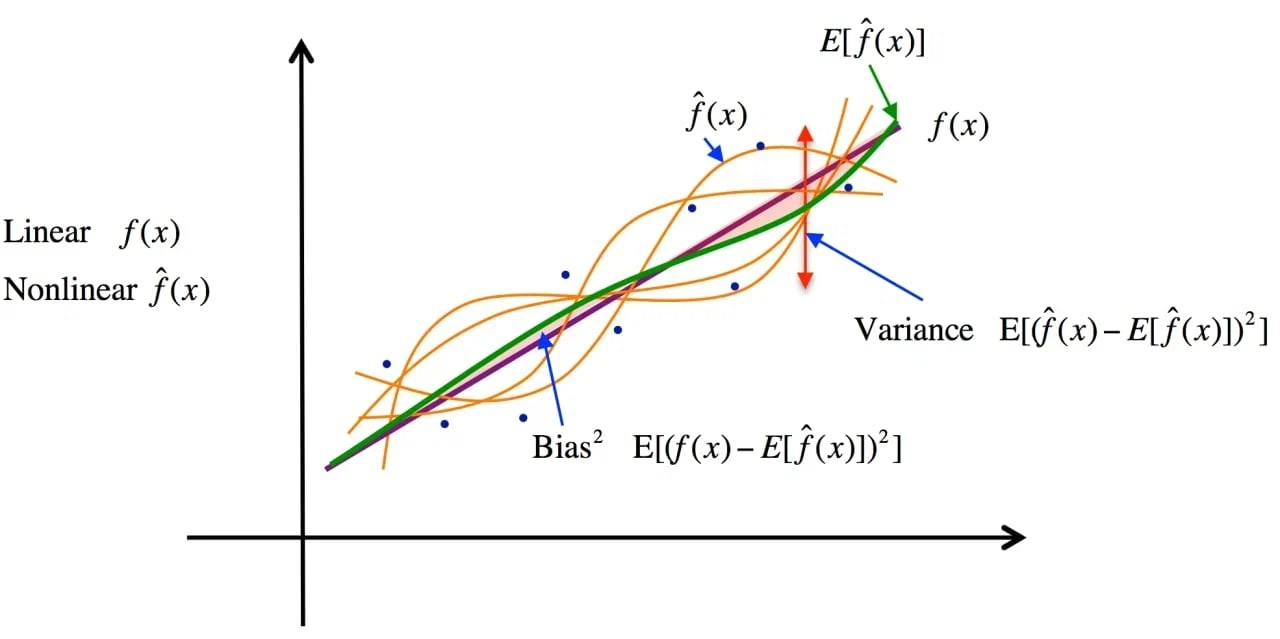

Аналогичную картинку можно нарисовать, если истинная функция нелинейная, а приближаем мы её линейной функцией.

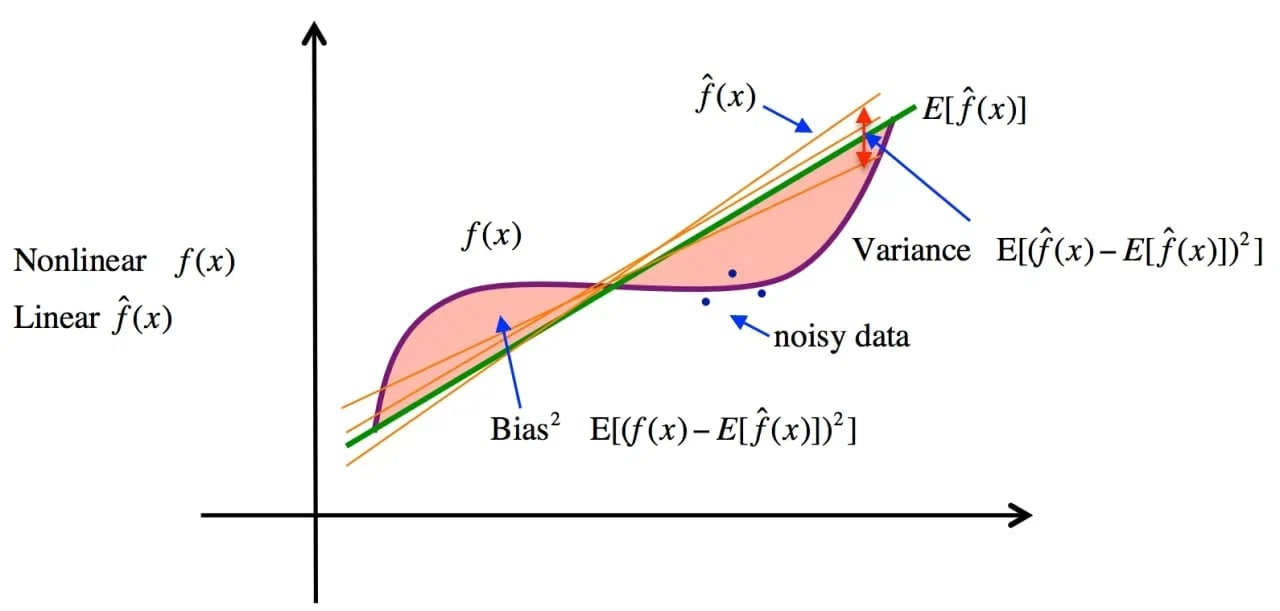

Оптимальная модель достигает минимума среднеквадратичной ошибки за счет компромисса между смещением и разбросом.

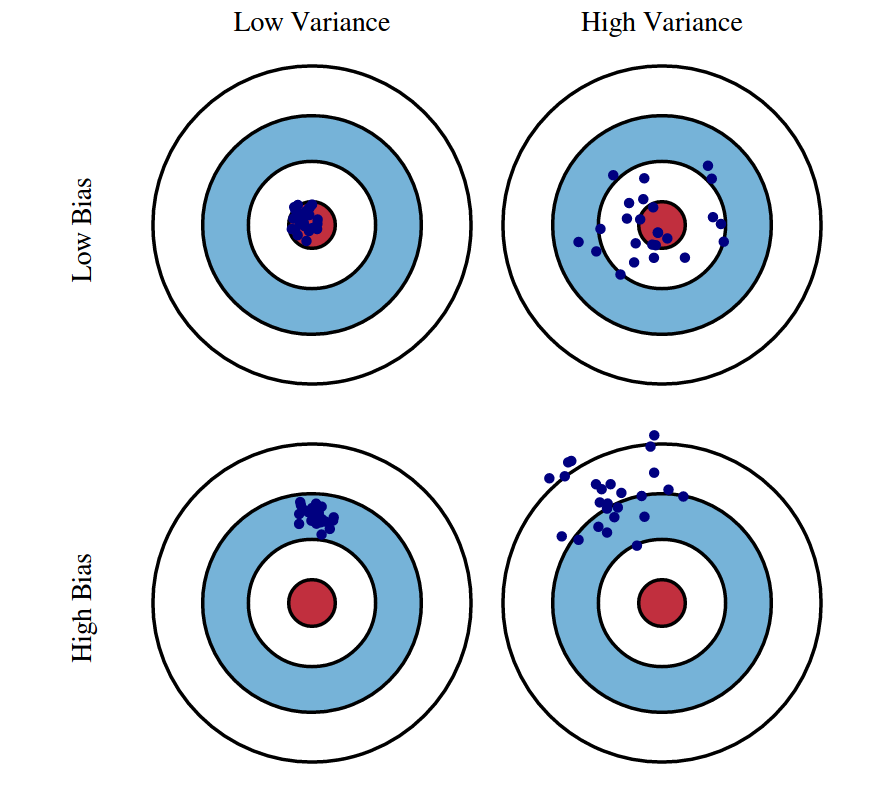

Это также называют решением проблем переобучения и недообучения.

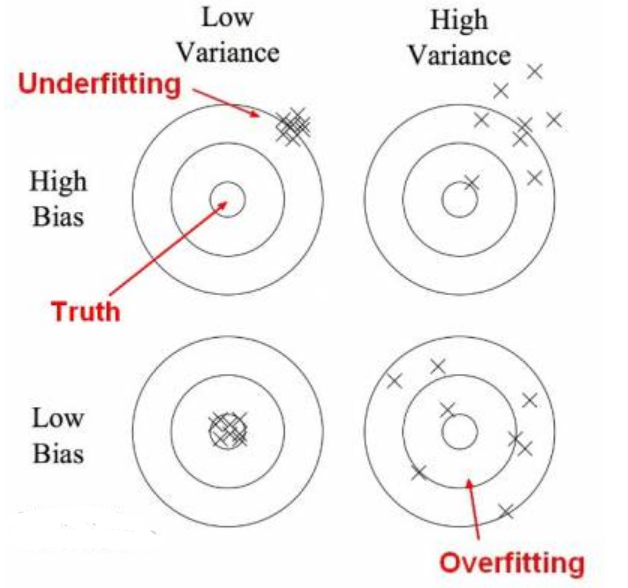

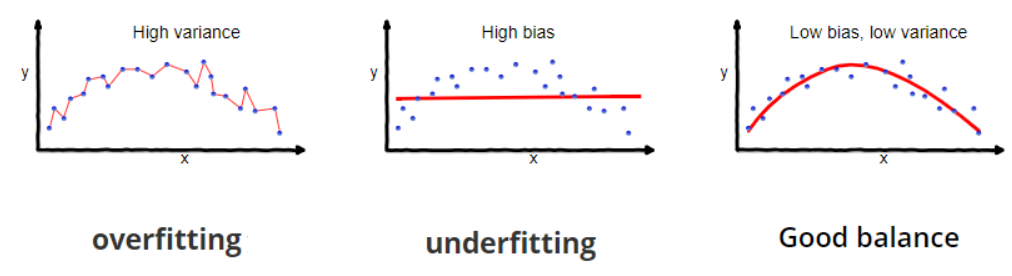 

Обычно это достигается вблизи равенства двух ошибок, но всё-таки в подавляющем большинстве случае в точке минимума ошибки присутствует некоторое смещение от равенства Bias = Variance.

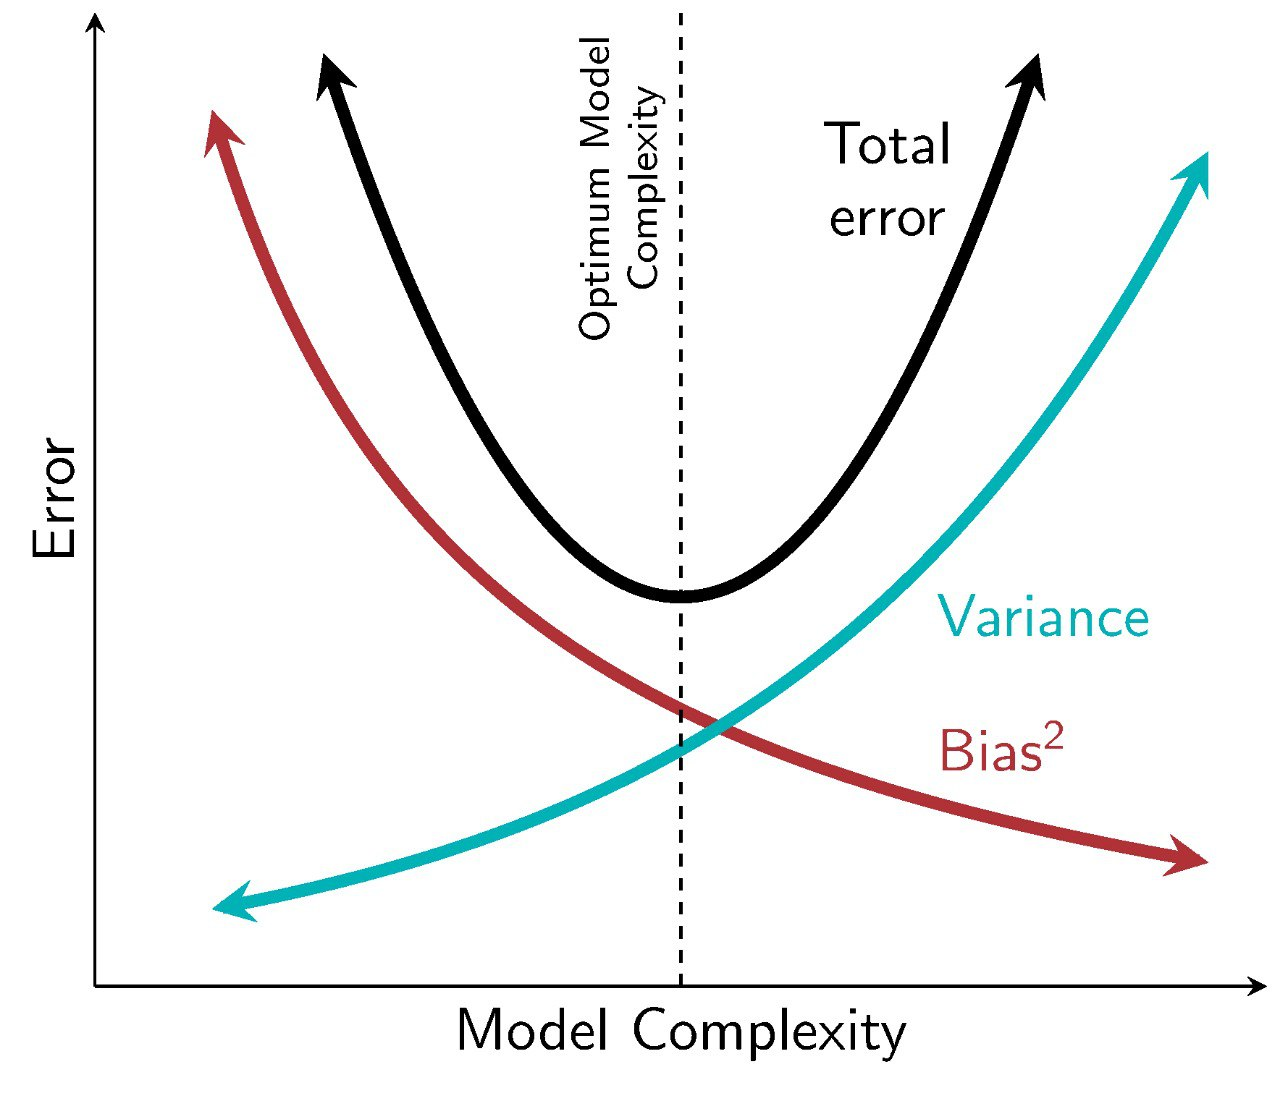

Более подробно можно почитать здесь
https://ml-handbook.ru/chapters/ml_theory/bias_variance_decomposition  